# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM


In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train)
# Data transformation
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

In [3]:
# Initialize the RNN model
model = Sequential()

# Add the first SimpleRNN layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second SimpleRNN layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third SimpleRNN layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth SimpleRNN layer without return_sequences
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.fit(X_train,y_train,epochs=32,batch_size=32)

Epoch 1/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 5.5028e-04
Epoch 2/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 5.2792e-04
Epoch 3/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 5.6315e-04
Epoch 4/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 5.6768e-04
Epoch 5/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 5.8556e-04
Epoch 6/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 8.1844e-04
Epoch 7/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 7.0385e-04
Epoch 8/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 6.1008e-04
Epoch 9/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 7.7968e-04
Epoch 10/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 5.6657e-04
Epoch 11/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 5.5472e-04
Epoch 12/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 7.2122e-04
Epoch 13/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 7.3440e-04
Epoch 14/32
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 5.6767e-04
Epoch 15/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


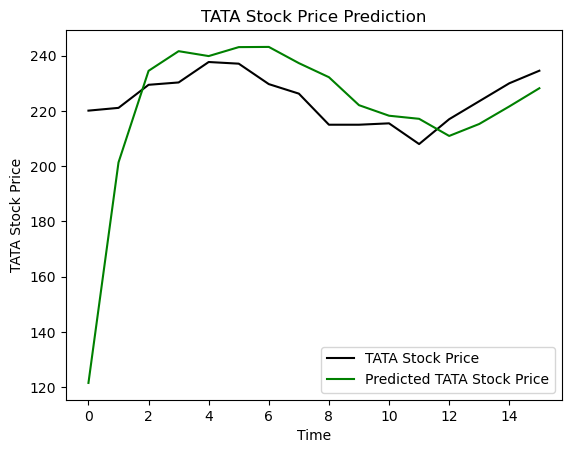

In [14]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
print()